In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

In [14]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly

def interp_plotter(xnodes,fnodes,xquery,ftrue):
    finterp = lagran_interp(xnodes,fnodes,xquery)
    plt.plot(xquery,np.ma.log10(np.abs(ftrue-finterp)))
    plt.xlabel("$x$")
    plt.ylabel("$\log_{10}|Error|$")

**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{x^{2}}{1+x^{4}}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $10$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $20$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

d) (4pts) Does using Chebyshev points help resolve the issues you saw in c) ?  Provide examples to verify your claim.

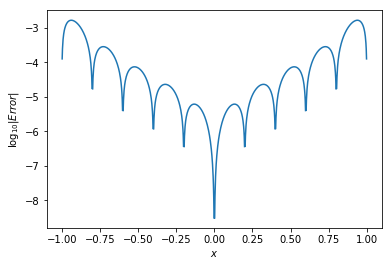

In [15]:
f1 = lambda x: x**2./(1.+x**4.)
xquery = np.linspace(-1.,1.,int(1e3)+1)
ftrue = f1(xquery)

xnodes = xquery[::100]
fnodes = ftrue[::100]
interp_plotter(xnodes,fnodes,xquery,ftrue)

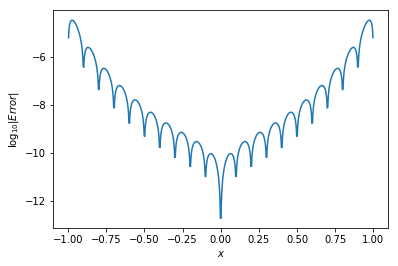

In [16]:
xnodes = xquery[::50]
fnodes = ftrue[::50]
interp_plotter(xnodes,fnodes,xquery,ftrue)

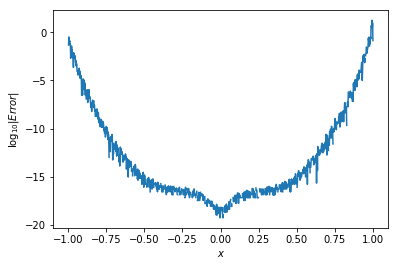

In [17]:
xnodes = xquery[::15]
fnodes = ftrue[::15]
interp_plotter(xnodes,fnodes,xquery,ftrue)

So, as we've seen in lecture, equi-spaced Lagrange interpolation can only go so far before it fails catastrophically.  Thus, we move to Chebyshev interpolation which uses node clustering at the edges of the domain.  The results are below.

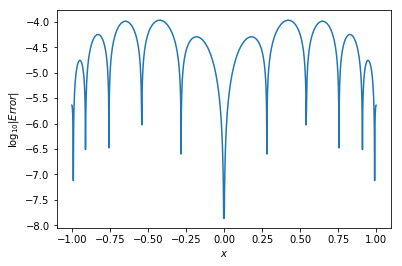

In [18]:
ncheb = 10
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = f1(xcheb)
interp_plotter(xcheb,fcheb,xquery,ftrue)

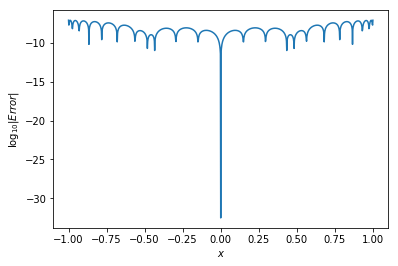

In [19]:
ncheb = 20
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = f1(xcheb)
interp_plotter(xcheb,fcheb,xquery,ftrue)

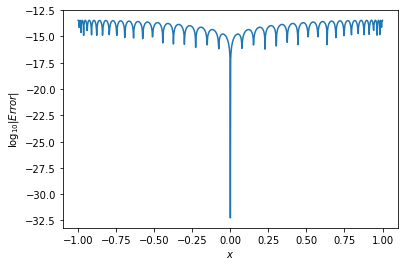

In [20]:
ncheb = 40
xcheb = np.cos(np.pi*(2.*np.arange(ncheb+1)+1.)/(2.*ncheb+2.))
fcheb = f1(xcheb)
interp_plotter(xcheb,fcheb,xquery,ftrue)

As we see, Chebyshev interpolation does a remarkably good job at approximating the function in a way which despite the non-uniform node spacing produces a far more uniform error profile.  

**Problem 2**: 10 pts - For the basis functions of Lagrange interpolation, $L^{(n)}_{j}(x)$, where 

$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

a) (3pts) Show that 

$$
\frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

b) (2pts) From this, find that 

$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \left\{ \begin{array}{rl} \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}} & k=j \\
& \\
\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})} & k\neq j
\end{array}\right.
$$

c) (2pts) If we suppose the Lagrange polynomial $P_{n}(x)$ is given by 

$$
P_{n}(x) = \sum_{j=0}^{n}f_{j}L^{(n)}_{j}(x),
$$

so that $P_{n}(x)\approx f(x)$, $f_{j}=f(x_{j})$, provide a brief explanation of how the formulas in part (b) allow you to generate finite-difference approximations to $f'(x_{j})$ for any number of points with any type of interpoint spacing.  

d) (3pts) Given the data $\left\{x_{j-1},f_{j-1},x_{j},f_{j},x_{j+1},f_{j+1},x_{j+2},f_{j+2}\right\}$, where 

$$
\delta x = x_{j}-x_{j-1}=x_{j+1}-x_{j}=x_{j+2}-x_{j+1} 
$$ 

derive the _forward-difference approximation_ to $f'(x_{j})\approx P_{2}'(x_{j})$ where

$$
P_{2}(x) = f_{j}L^{(2)}_{j}(x) + f_{j+1}L^{(2)}_{j+1}(x) + f_{j+2}L^{(2)}_{j+2}(x).
$$

How does your forward-difference approximation to $f'(x_{j})$ differ from the centered-difference approximation to $f'(x_{j})$ given by 

$$
f'(x_{j}) \approx \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1}\right).
$$

When might you use one or the other?

_Answer_

2a) 

2b)

2c)

2d) So, differentiating and evaluating we find that 

$$
\left.\frac{d}{dx}P_{2}(x) \right|_{x=x_{j}} = \frac{1}{\delta x}\left(-\frac{3}{2}f_{j} + 2f_{j+1} - \frac{1}{2}f_{j+2} \right)
$$

As we see, this is a markedly different formula than the centered difference approximation we derived previously.  In particular, it needs points only to the right of $x_{j}$, not to the left as in centered differencing.  Thus, we might prefer to use the current approximation to the derivative at a problem with a left side edge where information to the left is not available.  

**Problem 3**: 10 pts - Suppose I give you the data $\left\{x_{j},f_{j},s_{j}\right\}_{j=0}^{n}$, where I want to find a polynomial of degree $m$, say $P_{m}(x)$, where

$$
P_{m}(x) = \sum_{l=0}^{m}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{m}x^{m}, 
$$

such that 

$$
P_{m}(x_{j}) = f_{j}, ~ P'_{m}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$

Thus, if we want $P_{m}(x)\approx f(x)$, we ask not only that $P_{m}(x)$ interpolate $f(x)$ at $x_{j}$ so that $f(x_{j})=P_{m}(x_{j}) = f_{j}$, we also require that we match the slopes so that $f'(x_{j}) = P_{m}'(x_{j}) = s_{j}$.  This approximation is called _Hermite Interpolation_.

a) (1pt) How many equations do I need to solve in this interpolation problem?  What degree of polynomial do I need to choose in order to find a unique solution to my interpolation problem?

b) (2pts) Suppose we set our approximating polynomial $P_{2n+1}(x)$ to be 

$$
P_{2n+1}(x) = \sum_{l=0}^{n}f_{l}H_{l,n}(x) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x), 
$$

where the degree of the polynomials $H_{l,n}(x)$ and $\tilde{H}_{l,n}(x)$ are $2n+1$.  Show that we need these polynomials to satisfy the requirements

$$
H_{l,n}(x_{k}) = \delta_{kl}, ~ H'_{l,n}(x_{k}) = 0, ~ \tilde{H}_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = \delta_{kl},
$$

where 

$$
\delta_{kl} = \left\{\begin{array}{rl} 1 & k=l \\ 0 & k\neq l\end{array} \right.
$$

c) (3pts) Show the formulas 

$$
H_{l,n}(x) = \left(1 - 2(x-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

$$
\tilde{H}_{l,n}(x) = \left( x-x_{l} \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

satisfy the necessary requirements from part (b).  

d) Implement Hermite Interpolation using the results from above, including from Problem 2. For the test function 
$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$
develop three test cases which show the accuracy of your method.  Over equispaced interpolation data are you able to avoid the Runge-Phenomenon that we see for standard equispaced Lagrage interpolation?

_Answer_:

3a) We see that we have $2n+2$ equations to solve, thus we need $2n+2$ polynomial coefficients, and thus we need a degree $2n+1$ polynomial for our method.  

3b) If we want $P_{2n+1}(x_{k}) = f_{k}$, we see this requires

$$
H_{l,n}(x_{k}) = \delta_{lk}, ~ \tilde{H}_{l,n}(x_{k}) = 0.  
$$

The derivative requirement $P'_{2n+1}(x_{k}) = s_{k}$ then gets us

$$
H'_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = \delta_{lk}.  
$$

3c) So, noting that $\delta^{2}_{lk}=\delta_{lk}$ since $1^{2}=1$ and $1\times0 = 0$, we find that 

$$
\tilde{H}_{l,n}(x_k) = (x_k-x_{l})\delta^{2}_{lk} = 0,
$$

and

$$
\tilde{H}'_{l,n}(x_k) = \delta^{2}_{lk} + 2(x_{k}-x_{l})\delta_{lk}\frac{d}{dx}L^{(n)}_{l}(x_{k}) = \delta_{lk}.
$$

Likewise

$$
H_{l,n}(x_{k}) = \left(1 - 2(x_{k}-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\delta^{2}_{lk} = \delta_{lk},
$$

since if $l=k$, $x_{k}-x_{l} = 0$.  Finally, we have 

$$
H^{'}_{l,n}(x_{k}) = 2\delta_{lk}\left(\left(1-2(x_{k}-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l})\right)\frac{d}{dx}L^{(n)}_{l}(x_{k}) - \frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)
$$

We see then that if $l=k$

$$
H^{'}_{k,n}(x_{k}) = 2\left(\frac{d}{dx}L^{(n)}_{k}(x_{k}) - \frac{d}{dx}L^{(n)}_{k}(x_{k}) \right) = 0,
$$

and thus we have the result.  

3d) See code, results, and discussion below.  

Text(0.5, 1.0, 'Error in Hermite Interpolation')

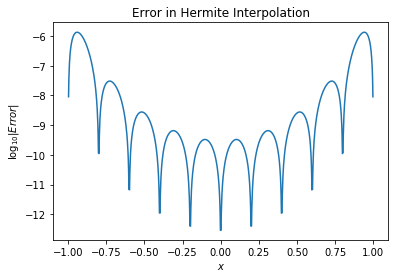

In [12]:
def dlndx(ll,xnodes):
    xll = xnodes[ll]
    xrem = xnodes[:ll]
    xrem = np.append(xrem,xnodes[ll+1:])
    return np.sum(1./(xll - xrem))
    
def hln(ll,xnodes,xquery,fval,sval):
    xll = xnodes[ll]
    lvec = lfun(xnodes,ll,xquery)
    lvec2 = lvec*lvec
    fhln = fval*(1.-2.*(xquery-xll)*dlndx(ll,xnodes))*lvec2
    shln = sval*(xquery-xll)*lvec2
    return fhln + shln
    
def hermite_interp(xnodes,fnodes,snodes,xquery):
    pvals = np.zeros(xquery.size)
    nvals = xnodes.size
    for jj in range(nvals):
        pvals += hln(jj,xnodes,xquery,fnodes[jj],snodes[jj])
    return pvals

f = lambda x: 1./(1.+x**2.)
fp = lambda x: -2.*x/(1.+x**2.)**2.
xquery = np.linspace(-1.,1.,int(1e3)+1)
ftrue = f(xquery)
fptrue = fp(xquery)

xnodes = xquery[::100]
fnodes = ftrue[::100]
snodes = fptrue[::100]
pfun = hermite_interp(xnodes,fnodes,snodes,xquery)
plt.plot(xquery,np.ma.log10(np.abs(pfun-ftrue)))
plt.xlabel("$x$")
plt.ylabel("$\log_{10}|Error|$")
plt.title("Error in Hermite Interpolation")

Text(0.5, 1.0, 'Error in Hermite Interpolation')

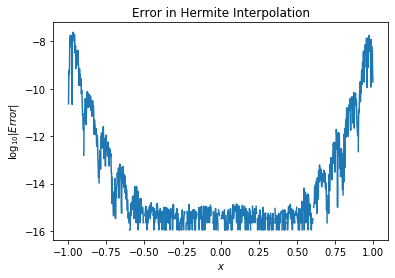

In [13]:
xnodes = xquery[::50]
fnodes = ftrue[::50]
snodes = fptrue[::50]
pfun = hermite_interp(xnodes,fnodes,snodes,xquery)
plt.plot(xquery,np.ma.log10(np.abs(pfun-ftrue)))
plt.xlabel("$x$")
plt.ylabel("$\log_{10}|Error|$")
plt.title("Error in Hermite Interpolation")

Text(0.5, 1.0, 'Error in Hermite Interpolation')

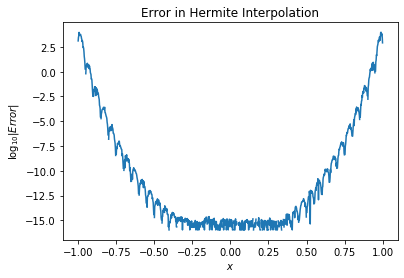

In [14]:
xnodes = xquery[::25]
fnodes = ftrue[::25]
snodes = fptrue[::25]
pfun = hermite_interp(xnodes,fnodes,snodes,xquery)
plt.plot(xquery,np.ma.log10(np.abs(pfun-ftrue)))
plt.xlabel("$x$")
plt.ylabel("$\log_{10}|Error|$")
plt.title("Error in Hermite Interpolation")

So we see using the same spacing choices on interpolation nodes as used above in the first problem, the overall error profile is three orders of magnitude better by including the first derivative information used by Hermite interpolation.  Doubling the number of nodes improves the overall approximation, but we can also see that the potential for breakdown in the approximaiton is manifesting itself via the jagged nature of the error curve.  This eventually makes the approximation fail faster than the standard Lagrange interpolation algorithm as seen in the last example.  